In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# задача 2

In [7]:
H0 = 5.
R = 30.
e = 0.01
mu = 0.7
g = 9.81

In [35]:
def Q(mu, e, h ,g):
    return mu * e * np.sqrt(2 * g) * h ** (3/2) * 2/3

In [30]:
tau = 0.01

In [58]:
h_t = H0
target = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 1.])
t = 0
hs = []
sec_in_days = 24 * 60 * 60
iters = int(sec_in_days / tau)
dt = int(60 / tau)
for i in range(iters):
    Q_t = Q(mu, e, h_t, g)
    h_t = h_t - Q_t * tau / (np.pi * R ** 2)
    if (i % dt == 0):
        hs.append(h_t)
    if (1 - h_t / H0) > target[t]:
        print(i * tau / sec_in_days)
        t += 1
    if t == 5:
        break
        
hs = np.array(hs)

0.0765957175925926
0.16713761574074074
0.2764461805555556
0.4120519675925926
0.5865318287037037


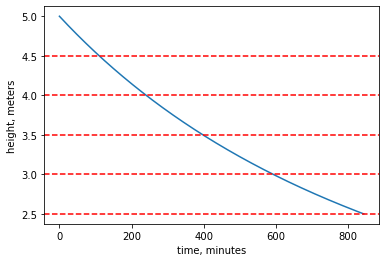

In [63]:
plt.plot(range(hs.shape[0]), hs)
plt.xlabel('time, minutes')
plt.ylabel('height, meters')
for tar in target[:-1]:
    plt.axhline(H0 * (1 - tar), c='r', linestyle='--')

# задача 4

In [23]:
data = pd.DataFrame({
    'A': [88,54,73,64,59,52,58,49], 
    'B': [89,69,78,61,64,50,57,48],
    'C': [91,58,79,60,61,58,59,57],
    'D': [87,68,70,69,64,49,56,47],
    'E': [92,74,76,68,67,50,58,49],
    'F': [86,85,81,79,80,77,76,79],
    'G': [89,88,75,74,73,72,70,71],
    'H': [80,88,78,70,68,67,66,67],
    'I': [90,89,87,56,62,57,45,50],
    'J': [93,91,88,89,88,87,90,86]
                    }, index=range(1,9))

In [24]:
data

,A,B,C,D,E,F,G,H,I,J
1,88,89,91,87,92,86,89,80,90,93
2,54,69,58,68,74,85,88,88,89,91
3,73,78,79,70,76,81,75,78,87,88
4,64,61,60,69,68,79,74,70,56,89
5,59,64,61,64,67,80,73,68,62,88
6,52,50,58,49,50,77,72,67,57,87
7,58,57,59,56,58,76,70,66,45,90
8,49,48,57,47,49,79,71,67,50,86


## Жадный на ставку алгоритм 

In [59]:
def order_compose(arr, items, bidders):
    k_i = len(items)
    k_b = len(bidders)
    res = []
    for i in arr:
        res.append((bidders[i // k_i], items[i % k_i]))
    return res

In [67]:
def greedy_combinator(q, items, bidders, one_get_one=False):
    satisfied = {b: False for b in bidders}
    given = {i: False for i in items}
    res = []
    for order in q:
        decision = not given[order[1]]
        if one_get_one:
            decision = decision and not satisfied[order[0]]
        if decision:
            res.append(order)
            given[order[1]] = True
            satisfied[order[0]] = True
    return res

In [75]:
def get_sum(data, orders):
    s = 0
    for o in orders:
        s += data.loc[o]
    return s

In [126]:
def form_final_check(bidders, order):
    res = {b: [] for b in bidders}
    for bidder, item in order:
        res[bidder].append(item)
    for b in bidders:
        res[b] = sorted(res[b])
    return res

In [127]:
def attempt1(data, one_to_one=False):
    orders = data.values.flatten().argsort()[::-1]
    queue = order_compose(orders, data.columns, data.index)
    ans = greedy_combinator(queue, data.columns, data.index, one_to_one)
    return form_final_check(data.index, ans), get_sum(data, ans)

In [130]:
print(*attempt1(data, True))

{1: ['J'], 2: ['I'], 3: ['F'], 4: ['G'], 5: ['H'], 6: ['A'], 7: ['C'], 8: ['E']} 565


## Жадный на (ставка/ср. цена вещи или её корень) алгоритм 

In [84]:
data_norm = data.copy()
data_norm

,A,B,C,D,E,F,G,H,I,J
1,88,89,91,87,92,86,89,80,90,93
2,54,69,58,68,74,85,88,88,89,91
3,73,78,79,70,76,81,75,78,87,88
4,64,61,60,69,68,79,74,70,56,89
5,59,64,61,64,67,80,73,68,62,88
6,52,50,58,49,50,77,72,67,57,87
7,58,57,59,56,58,76,70,66,45,90
8,49,48,57,47,49,79,71,67,50,86


In [89]:
data_norm.mean()

A    1.0
B    1.0
C    1.0
D    1.0
E    1.0
F    1.0
G    1.0
H    1.0
I    1.0
J    1.0
dtype: float64

In [88]:
data_norm = data_norm / data_norm.mean()
data_norm

,A,B,C,D,E,F,G,H,I,J
1,1.416499,1.379845,1.391969,1.364706,1.378277,1.069984,1.163399,1.095890,1.343284,1.044944
2,0.869215,1.069767,0.887189,1.066667,1.108614,1.057543,1.150327,1.205479,1.328358,1.022472
3,1.175050,1.209302,1.208413,1.098039,1.138577,1.007776,0.980392,1.068493,1.298507,0.988764
4,1.030181,0.945736,0.917782,1.082353,1.018727,0.982893,0.967320,0.958904,0.835821,1.000000
5,0.949698,0.992248,0.933078,1.003922,1.003745,0.995334,0.954248,0.931507,0.925373,0.988764
6,0.837022,0.775194,0.887189,0.768627,0.749064,0.958009,0.941176,0.917808,0.850746,0.977528
7,0.933602,0.883721,0.902486,0.878431,0.868914,0.945568,0.915033,0.904110,0.671642,1.011236
8,0.788732,0.744186,0.871893,0.737255,0.734082,0.982893,0.928105,0.917808,0.746269,0.966292


In [128]:
def attempt2(data, one_to_one=False):
    data_norm = data.copy()
    data_norm = data_norm / data_norm.mean()
    orders = data_norm.values.flatten().argsort()[::-1]
    queue = order_compose(orders, data_norm.columns, data_norm.index)
    ans = greedy_combinator(queue, data_norm.columns, data_norm.index, one_to_one)
    return form_final_check(data.index, ans), get_sum(data, ans)

In [131]:
print(*attempt2(data, True))

{1: ['A'], 2: ['I'], 3: ['B'], 4: ['D'], 5: ['E'], 6: ['G'], 7: ['J'], 8: ['F']} 632


In [129]:
def attempt3(data, one_to_one=False):
    data_norm = data.copy()
    data_norm = data_norm / np.sqrt(data_norm.mean())
    orders = data_norm.values.flatten().argsort()[::-1]
    queue = order_compose(orders, data_norm.columns, data_norm.index)
    ans = greedy_combinator(queue, data_norm.columns, data_norm.index, one_to_one)
    return form_final_check(data.index, ans), get_sum(data, ans)

In [148]:
print(*attempt3(data, True), sep='\n\n')

{1: ['E'], 2: ['I'], 3: ['C'], 4: ['D'], 5: ['F'], 6: ['G'], 7: ['J'], 8: ['H']}

638


## Новые данные

In [105]:
data2 = pd.read_csv('data_1.csv', index_col='id', nrows=17).T
data2

id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,R
1,100,139,178,158,149,148,220,188,179,168,199,209,130,178,170,269,190
2,110,129,179,150,211,218,180,179,178,238,240,250,179,120,139,212,210
3,119,212,138,181,148,210,178,159,227,200,190,220,140,160,150,222,210
4,120,190,208,199,120,137,198,261,170,201,168,237,189,150,160,268,189
5,140,159,149,169,177,159,190,199,189,110,129,197,148,169,178,247,218
6,130,151,188,199,161,169,171,208,179,138,160,188,179,149,201,259,220
7,100,170,169,207,181,160,199,170,200,141,178,179,170,140,178,216,197


In [155]:
order3, s3 = attempt3(data2)
print(*order3.items(), '\n', s3, sep='\n')

('1', ['G', 'N', 'P'])
('2', ['E', 'F', 'J', 'K', 'L'])
('3', ['B', 'I'])
('4', ['C', 'H', 'M'])
('5', ['A'])
('6', ['O', 'R'])
('7', ['D'])


3689


In [134]:
order1

{'1': ['G', 'N', 'P'],
 '2': ['E', 'F', 'J', 'K', 'L'],
 '3': ['B', 'I'],
 '4': ['C', 'H', 'M'],
 '5': ['A'],
 '6': ['O', 'R'],
 '7': ['D']}

In [135]:
order2

{'1': ['G', 'N', 'P'],
 '2': ['E', 'F', 'J', 'K', 'L'],
 '3': ['B', 'I'],
 '4': ['C', 'H', 'M'],
 '5': ['A'],
 '6': ['O', 'R'],
 '7': ['D']}

In [136]:
order3

{'1': ['G', 'N', 'P'],
 '2': ['E', 'F', 'J', 'K', 'L'],
 '3': ['B', 'I'],
 '4': ['C', 'H', 'M'],
 '5': ['A'],
 '6': ['O', 'R'],
 '7': ['D']}

In [137]:
data3 = pd.read_csv('data_2.csv', index_col='id', nrows=18).T
data3

id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,R,S
1,100,139,177,161,151,150,220,189,178,168,198,209,129,179,167,269,189,188
2,110,128,180,150,210,220,181,178,181,239,241,246,181,119,138,209,210,168
3,119,208,139,181,150,207,180,159,231,198,190,221,139,160,148,219,208,181
4,119,190,210,198,121,140,199,258,169,199,168,240,187,149,159,268,190,227
5,138,159,147,168,178,157,190,199,191,110,130,201,148,168,180,250,219,221
6,130,150,188,198,158,168,169,210,178,138,159,188,180,150,199,257,220,199
7,100,169,170,208,179,159,200,168,198,138,178,178,170,139,177,221,198,228


In [156]:
order6, s6 = attempt3(data3)
print(*order6.items(), '\n', s6, sep='\n')

('1', ['G', 'N', 'P'])
('2', ['E', 'F', 'J', 'K', 'L'])
('3', ['B', 'I'])
('4', ['C', 'H', 'M'])
('5', ['A'])
('6', ['O', 'R'])
('7', ['D', 'S'])


3911


In [141]:
order4, s4 = attempt1(data3)
order5, s5 = attempt2(data3)
order6, s6 = attempt3(data3)
print(f'{s4} vs. {s5} vs. {s6}')

3911 vs. 3911 vs. 3911


In [142]:
order4

{'1': ['G', 'N', 'P'],
 '2': ['E', 'F', 'J', 'K', 'L'],
 '3': ['B', 'I'],
 '4': ['C', 'H', 'M'],
 '5': ['A'],
 '6': ['O', 'R'],
 '7': ['D', 'S']}

In [143]:
order5

{'1': ['G', 'N', 'P'],
 '2': ['E', 'F', 'J', 'K', 'L'],
 '3': ['B', 'I'],
 '4': ['C', 'H', 'M'],
 '5': ['A'],
 '6': ['O', 'R'],
 '7': ['D', 'S']}

In [144]:
order6

{'1': ['G', 'N', 'P'],
 '2': ['E', 'F', 'J', 'K', 'L'],
 '3': ['B', 'I'],
 '4': ['C', 'H', 'M'],
 '5': ['A'],
 '6': ['O', 'R'],
 '7': ['D', 'S']}